In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [ ]:
#load the data set
data = pd.read_csv('Housing.csv')

#target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

In [ ]:
data.info()
data.isnull().sum()*100/data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_semi-furnished  545 non-null    b

price                              0.0
area                               0.0
bedrooms                           0.0
bathrooms                          0.0
stories                            0.0
mainroad                           0.0
guestroom                          0.0
basement                           0.0
hotwaterheating                    0.0
airconditioning                    0.0
parking                            0.0
prefarea                           0.0
furnishingstatus_semi-furnished    0.0
furnishingstatus_unfurnished       0.0
dtype: float64

In [ ]:
print(data.dtypes)


price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object


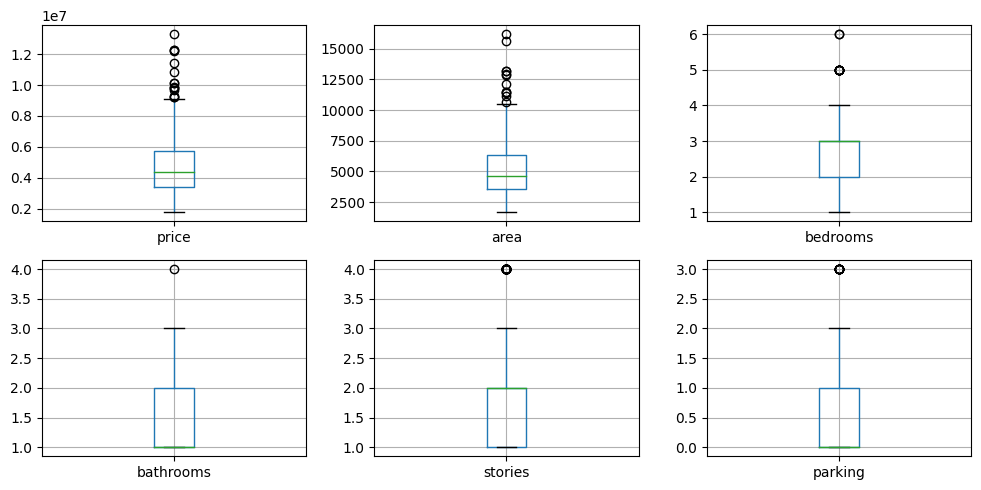

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

pd.plotting.boxplot(data[['price']], ax=axs[0, 0])
pd.plotting.boxplot(data[['area']], ax=axs[0, 1])
pd.plotting.boxplot(data[['bedrooms']], ax=axs[0, 2])
pd.plotting.boxplot(data[['bathrooms']], ax=axs[1, 0])
pd.plotting.boxplot(data[['stories']], ax=axs[1, 1])
pd.plotting.boxplot(data[['parking']], ax=axs[1, 2])

plt.tight_layout()
plt.show()

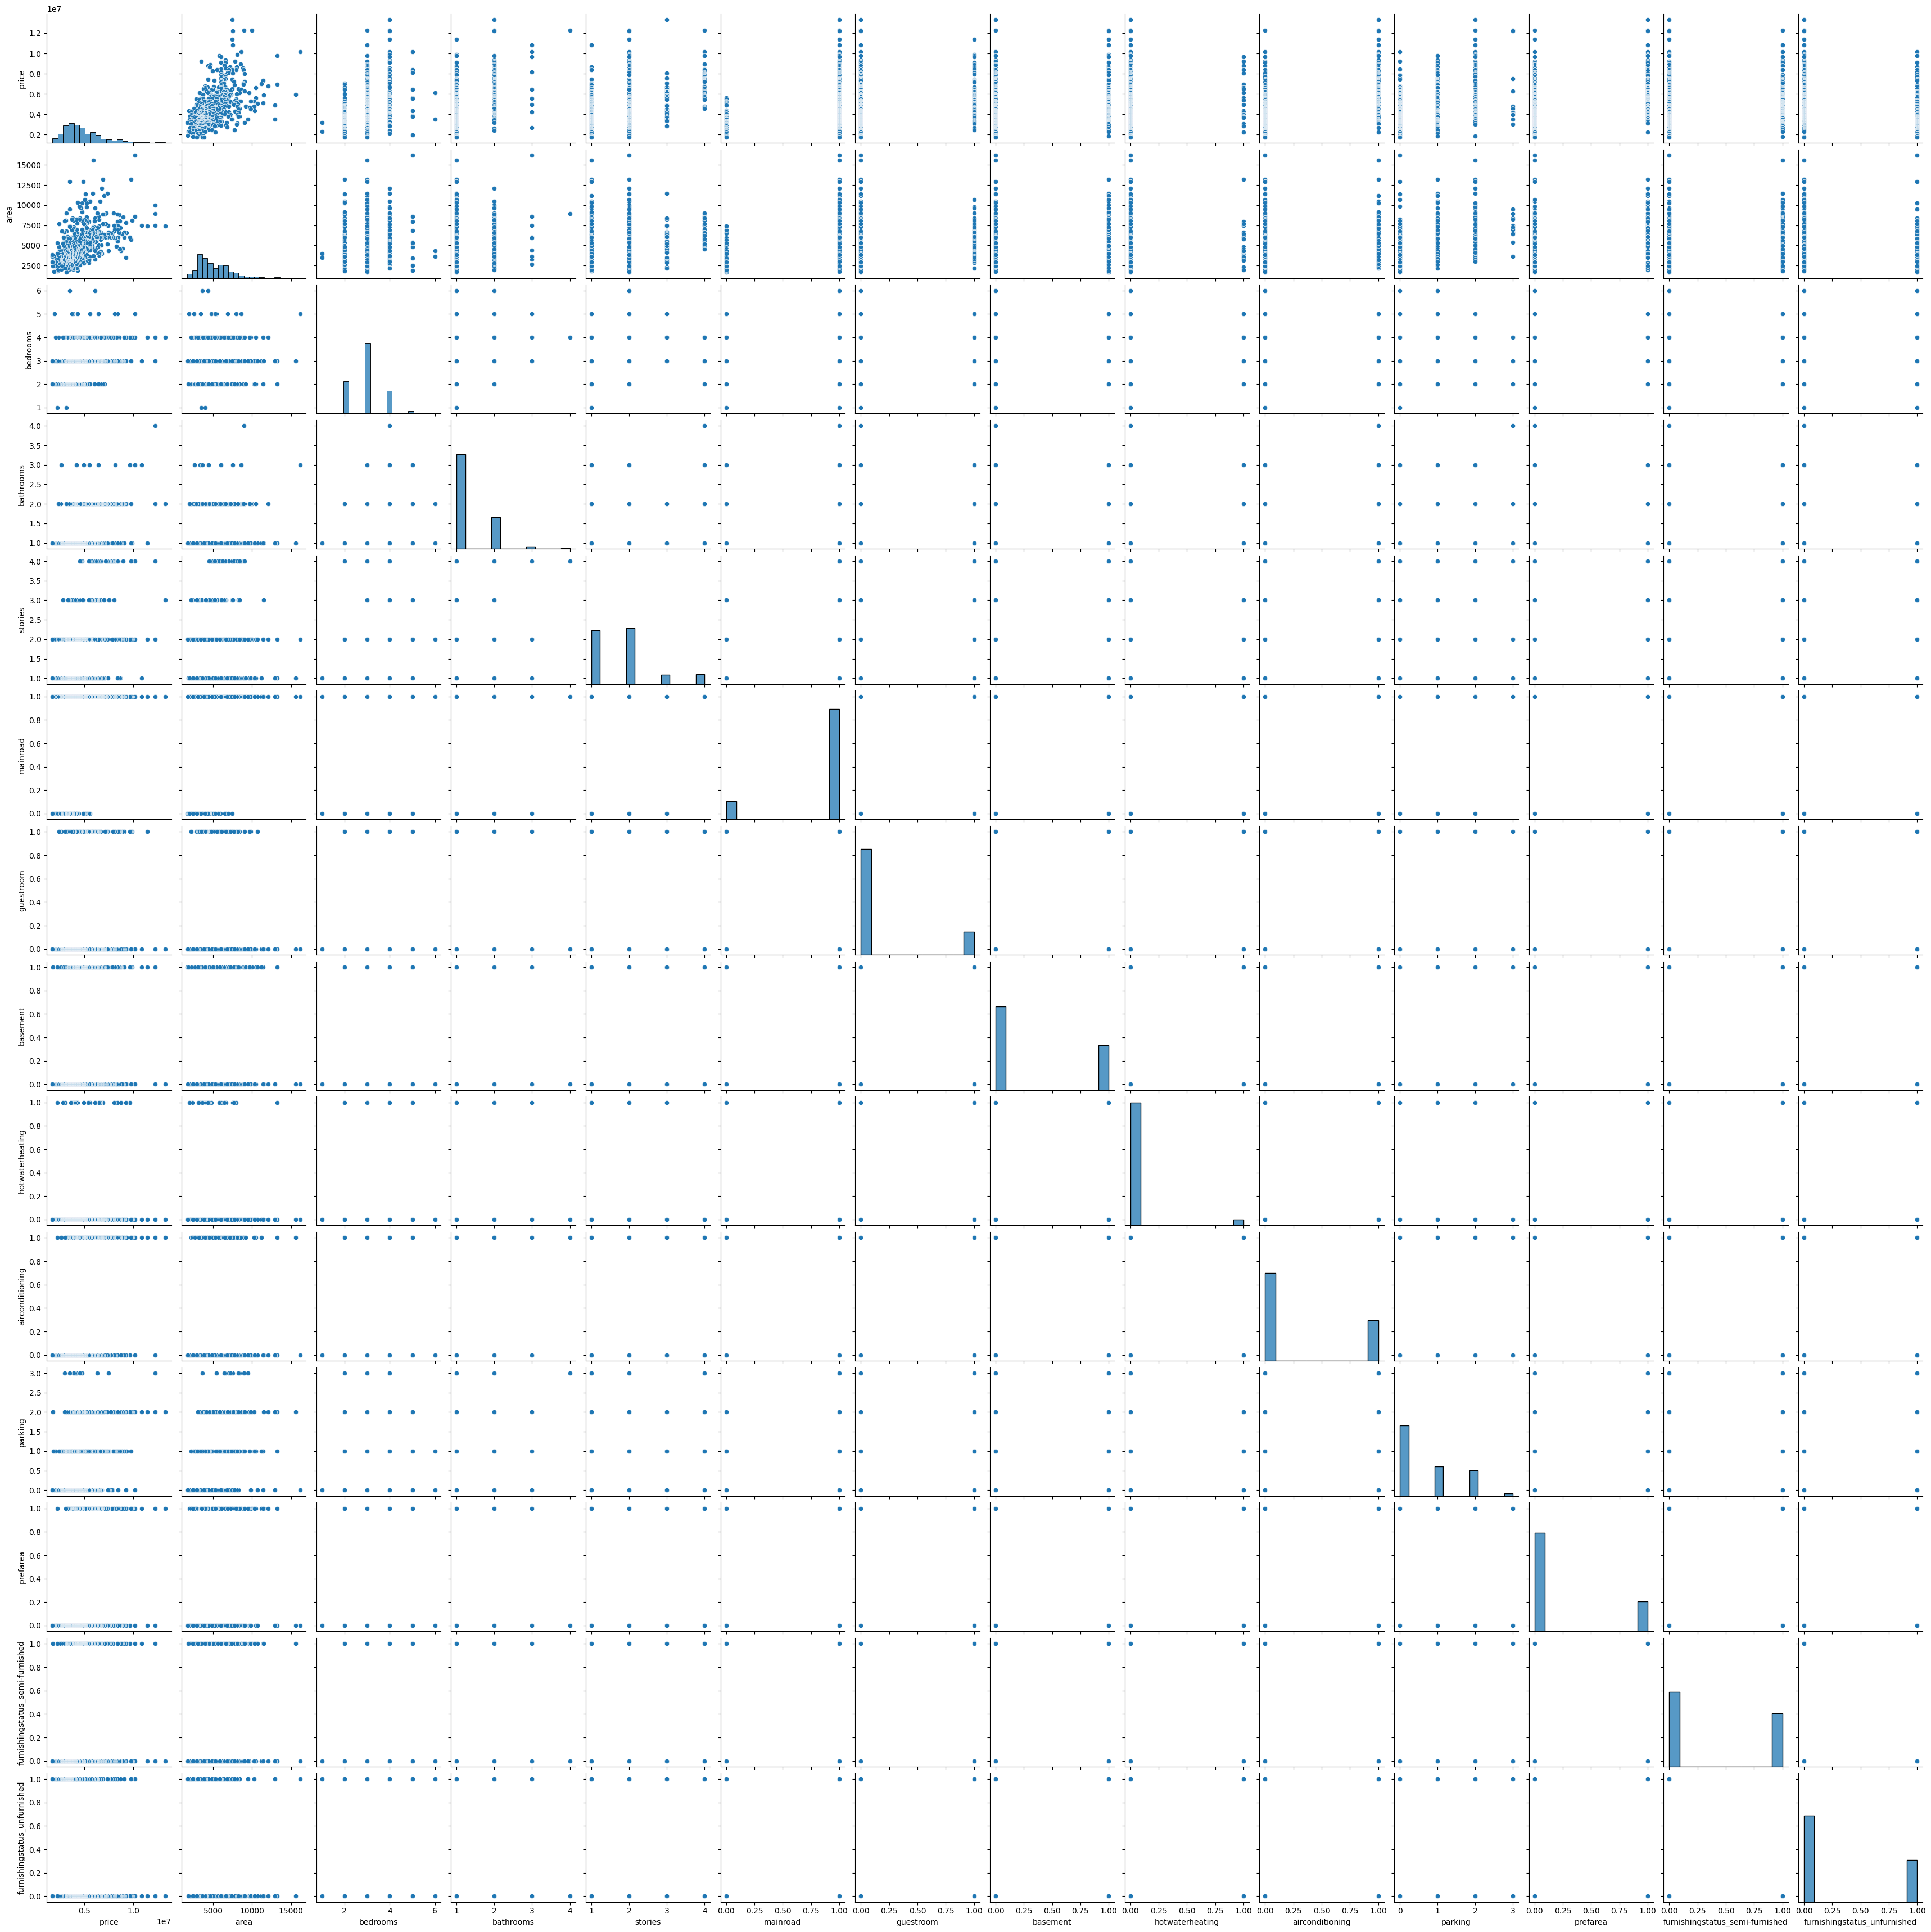

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [28]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [34]:
status = pd.get_dummies(data['furnishingstatus_semi-furnished']) # Remove the tab character at the end of the column name

In [ ]:
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

In [30]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Mean Squared Error: 1800793719718.967
Coefficients: [2.37710510e+02 7.84836476e+04 1.10932614e+06 4.26909551e+05
 2.47443135e+05 4.12677757e+05 2.43606446e+05 4.35005497e+05
 7.12264653e+05 8.08415428e+05 6.36787694e+05]
Intercept: -72427.55025564972
